# Algorithme kmeans version 2

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns



df = make_blobs(n_samples=300, n_features=2)
df = pd.DataFrame(
    {
        'feature0' : df[0][:,0],
        'feature1' : df[0][:, 1],
        'cluster_initial' : df[1]
    }
)


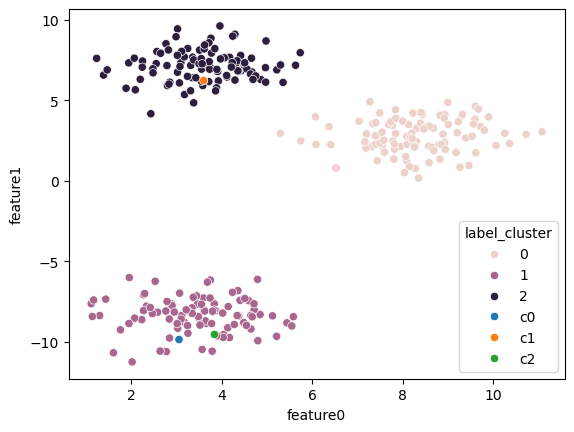

In [5]:
k = 3

#Etape 1 : création df avec centroïdes de départ et coordonnées

df_centroide = pd.DataFrame(
    {"label_cluster":[],
    "feature0":[],
    'feature1':[]}
)
for nb_cluster in range(k):
    index_temp = np.random.choice(a=df.index.values, size=1)
    number_cluster_temp = 'c'+str(nb_cluster)
    c_temp = df.iloc[index_temp, :].drop(columns='cluster_initial').assign(label_cluster=number_cluster_temp)
    df_centroide = pd.concat([df_centroide, c_temp])

#Etape 2 : plot du dataset avec centroides actuels

sns.scatterplot(x=df['feature0'], y=df['feature1'], hue=df['cluster_initial'])
sns.scatterplot(x=df_centroide['feature0'], y=df_centroide['feature1'], hue=df_centroide["label_cluster"])
plt.show()


In [6]:
df

,feature0,feature1,cluster_initial
0,3.906587,6.784569,2
1,7.277732,4.902965,0
2,4.668154,6.753092,2
3,7.495753,2.535594,0
4,3.759075,8.847467,2
...,...,...,...
295,3.619307,8.429168,2
296,2.477815,6.700363,2
297,9.537157,2.767839,0
298,3.211062,-8.020101,1


In [7]:
df_centroide

,label_cluster,feature0,feature1
193,c0,3.051747,-9.867204
65,c1,3.596559,6.219870
196,c2,3.836328,-9.555852


In [8]:
# Etape 3 : fonction calcul distance avec centroide

def calcul_distance_avec_centroides(df_donnees:pd.DataFrame, df_centre:pd.DataFrame) -> pd.DataFrame:
    """fonciton qui prend le dataset, calcule les distances entre chaque instance et les centroides, et renvoie le df avec les distance"""
    df_temp = df_donnees.copy()
    #calcul des distances
    for k in range(len(df_centre)):
        c_temp = np.transpose(pd.DataFrame(df_centre.iloc[k,:]))
        df_temp[f"distance_c{k}"] = (((df['feature0']-c_temp['feature0'].values))**2 +  ((df['feature1']-c_temp['feature1'].values)**2))**(1/2)
    return df_temp




#Etape 4 : fonction assigner labels clusters
def assigner_clusters_data(df:pd.DataFrame) -> pd.DataFrame:
    df_temp = df.iloc[:,3:]
    k=len(df_temp.columns)
    liste_cluster = []
    for index in range(len(df_temp)):
        # liste_cluster.append("c"+str(df_temp.iloc[index, :].argmin(axis=0)))
        liste_cluster.append((df_temp.iloc[index, :].argmin(axis=0)))
    df_temp = df.assign(
        label_cluster = liste_cluster
    )
    return df_temp


#Etape 5 : calculer les nouveaux centres
def calcul_nouveau_centroides(df:pd.DataFrame) -> pd.DataFrame:
    df_temp= df.groupby(by='label_cluster').mean().loc[:, ['feature0', 'feature1']].reset_index()
    return df_temp


# Etape 6 : Boucle for avec max_iter
test  = df.copy()
test_centre=df_centroide.copy()


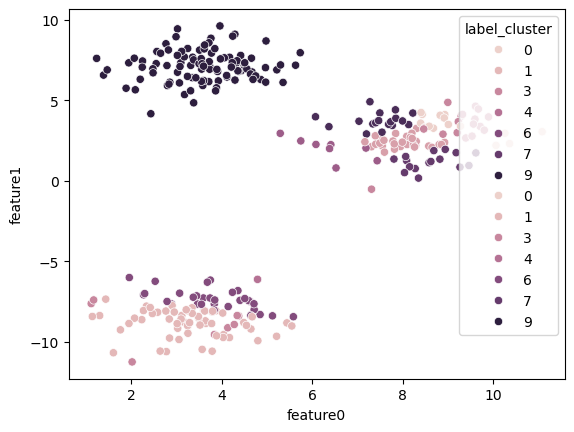

In [16]:
max_iter=5

for i in range(max_iter):
    test = calcul_distance_avec_centroides(df_donnees=test, df_centre=test_centre)
    test = assigner_clusters_data(test)
    test_centre=calcul_nouveau_centroides(test)

    # sns.scatterplot(x=test['feature0'], y=test['feature1'], hue=test['label_cluster'])
    # sns.scatterplot(x=test_centre['feature0'], y=test_centre['feature1'], hue=test_centre["label_cluster"])
    # plt.show()

sns.scatterplot(x=test['feature0'], y=test['feature1'], hue=test['label_cluster'])
sns.scatterplot(x=test_centre['feature0'], y=test_centre['feature1'], hue=test_centre["label_cluster"])
plt.show()

In [12]:
test

,feature0,feature1,cluster_initial,distance_c0,distance_c1,distance_c2
0,3.906587,6.784569,2,16.6737,0.644207,16.340572
1,7.277732,4.902965,0,15.362839,3.909638,14.862727
2,4.668154,6.753092,2,16.698712,1.19693,16.330143
3,7.495753,2.535594,0,13.174923,5.364475,12.633071
4,3.759075,8.847467,2,18.728033,2.632618,18.403481
...,...,...,...,...,...,...
295,3.619307,8.429168,2,18.305172,2.209415,17.986329
296,2.477815,6.700363,2,16.577505,1.217564,16.312881
297,9.537157,2.767839,0,14.202283,6.870751,13.578395
298,3.211062,-8.020101,1,1.853961,14.245188,1.658158


In [13]:
calcul_distance_avec_centroides(df_donnees=df, df_centre=df_centroide)

,feature0,feature1,cluster_initial,distance_c0,distance_c1,distance_c2
0,-0.283677,9.717508,0,6.604894,9.830494,0.0
1,0.915763,9.811192,0,5.494563,8.805126,1.203093
2,1.632711,6.830570,0,4.554657,7.098802,3.465105
3,6.322162,6.438476,1,1.472792,2.46217,7.374901
4,6.821400,4.586261,1,3.388008,2.025786,8.764235
...,...,...,...,...,...,...
295,7.965641,8.771060,2,2.097599,3.301353,8.303433
296,7.139449,6.757347,1,1.561416,1.914689,7.99158
297,7.201198,11.083087,2,3.391567,5.72601,7.608427
298,5.546385,7.433934,2,0.687864,3.606857,6.261336


In [15]:
assigner_clusters_data(calcul_distance_avec_centroides(df_donnees=df, df_centre=df_centroide))


,feature0,feature1,cluster_initial,distance_c0,distance_c1,distance_c2,label_cluster
0,-0.283677,9.717508,0,6.604894,9.830494,0.0,c2
1,0.915763,9.811192,0,5.494563,8.805126,1.203093,c2
2,1.632711,6.830570,0,4.554657,7.098802,3.465105,c2
3,6.322162,6.438476,1,1.472792,2.46217,7.374901,c0
4,6.821400,4.586261,1,3.388008,2.025786,8.764235,c1
...,...,...,...,...,...,...,...
295,7.965641,8.771060,2,2.097599,3.301353,8.303433,c0
296,7.139449,6.757347,1,1.561416,1.914689,7.99158,c0
297,7.201198,11.083087,2,3.391567,5.72601,7.608427,c0
298,5.546385,7.433934,2,0.687864,3.606857,6.261336,c0


In [18]:
calcul_nouveau_centroides(assigner_clusters_data(calcul_distance_avec_centroides(df_donnees=df, df_centre=df_centroide)))


,number_cluster,feature0,feature1
0,c0,6.372050,8.680065
1,c1,7.389743,5.585352
2,c2,0.739460,9.287234
